# Zeiler-Fergusの手法

## 画像の前処理

In [1]:
from keras.preprocessing import image
import numpy as np

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
using GPU: 0


画像を読み込む関数

In [2]:
from keras.applications.vgg16 import preprocess_input

def load_image(filename, target_size):
    img = image.load_img(filename, target_size=target_size)
    x = image.img_to_array(img)
    x = preprocess_input(x)

    return x

マスクがかけられた画像を作成する関数

In [3]:
def create_masked_image(img, position, size):
    h, w = img.shape[:2]
    left, right = np.clip([position[0], position[0] + size[0]], 0, w )
    top, bottom = np.clip([position[1], position[1] + size[1]], 0, h)
    
    result = img.copy()
    result[top:bottom, left:right, :] = 0
    
    return result

## ImageNet学習済みモデルの読み込み
VGG16を使用

In [4]:
from keras.applications.vgg16 import VGG16

model = VGG16(include_top=True, weights='imagenet')

## ヒートマップ作成

指定したクラスの確率を取得する関数

In [5]:
from keras.applications.vgg16 import decode_predictions

def get_probability_from_prediction(prediction, name):
    probs = {p[1]: p[2] for p in decode_predictions(prediction, top=1000)[0]}
    
    return probs[name]

カラーマップを作成する関数

In [6]:
import math
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def create_heatmap(filename, classname):
    img = load_image(filename, (224, 224))
    
    heatmap = []
    for y in range(-56, 216, 8):
        for x in range(-56, 216, 8):
            masked_img = create_masked_image(img, (x, y), (64, 64))
            
            preds = model.predict(np.array([masked_img]))
            prob = get_probability_from_prediction(preds, classname)
            heatmap.append(prob)
    
    size = int(math.sqrt(len(heatmap)))
    heatmap = np.array(heatmap).reshape((size, size))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.array(Image.open(filename).resize((224, 224))))
    
    ax2 = fig.add_subplot(122)
    im = ax2.imshow(heatmap, cmap='gist_rainbow_r')
    im.set_clim(0, 1)
    fig.colorbar(im)

## 実験

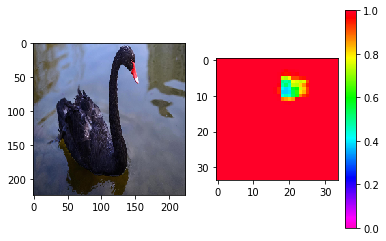

In [7]:
heatmap = create_heatmap('imgs/black_swan.jpg', 'black_swan')

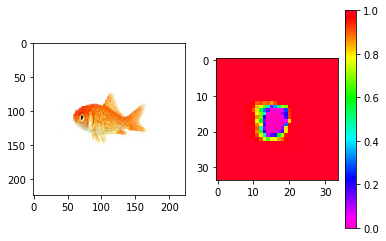

In [8]:
heatmap = create_heatmap('imgs/gold_fish.jpg', 'goldfish')

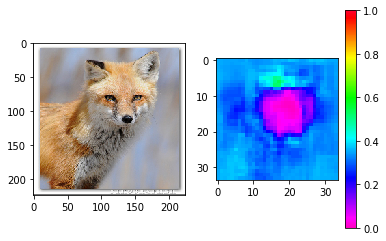

In [9]:
heatmap = create_heatmap('imgs/kit_fox.jpg', 'kit_fox')

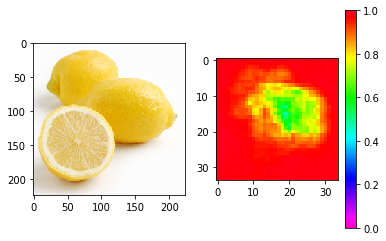

In [10]:
heatmap = create_heatmap('imgs/lemon.jpg', 'lemon')

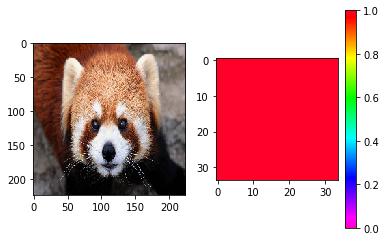

In [11]:
heatmap = create_heatmap('imgs/lesser_panda.jpg', 'lesser_panda')